# Machine Learning With Keras

## Imports

In [16]:
import tensorflow as tf
import keras
import time

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

## Loading in Dataset

In [17]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [18]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Defining our classes/labels

In [19]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [20]:
#to show how the size of the images and how many
train_images.shape

(60000, 28, 28)

In [21]:
#the training labels for each image in training set
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [22]:
train_labels.shape

(60000,)

In [23]:
test_images.shape

(10000, 28, 28)

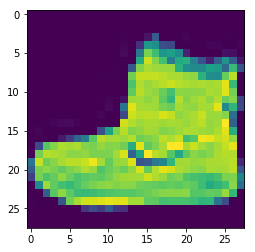

In [24]:
plt.figure()
plt.imshow(train_images[0])
plt.grid(False)

## Scaling the images
All values are scaled to a range of 0 to 1 before feeding to the neural network model. Extremely important step this lowers accuracy to 10% from 90%

In [25]:
train_images = train_images / 255.0

test_images = test_images / 255.0

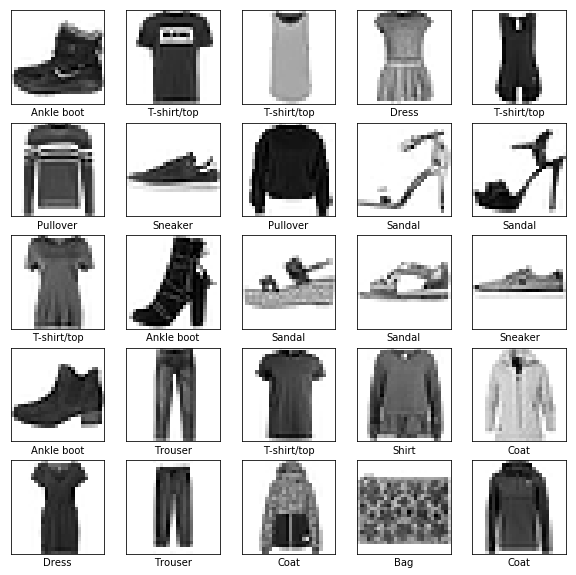

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
    

## General Terms

**Flatten:** transforms the format of the images from a 2D array to a long 1D array

**Epoch:** One full training cycle. Once every sample in the set is seen the algorithm starts again beginning the second epoch

**Activation Function:** They convert a input signal of a node in a Neural Network to an output signal

**Loss Function:** Measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction

**Optimizer:** This is how the model is updated based on the data it sees and its loss function

**Metrics:** These are used to monitor training and testing steps.

**Image kernals:** They are the same as image convolutions and masks. The kernal refers to the 2D matrix operation performed on the pixel values of an image.
http://setosa.io/ev/image-kernels/

**Sequential Model:** Most common type of Keras model, it is simply a linear stack of layers.

**Batch Size:** How many images are processed before the weights are changed

## Layers

**Dense:** A linear operation in which every input is connected to every output by a weight. This means for every input there is an output.

**Convolutional:** A linear operation using a subset of the weights from a dense layer. The weights for the convolutions at each location are shared. Due to the weight sharing, and the use of a subset of the weights of a dense layer, there's far less weights than in a dense layer

**Pooling:** Replace each patch in the input with a single output which is the maximum or average of the input patch

**Normalization:** Scale the input so that the output has a near zero mean and unit standard deviation, to allow faster more resiliant training

## Test Models

In [27]:
#reshaping
#this assumes our data format
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
#(train_images, train_labels)
if keras.backend.image_data_format() == 'channels_first':
    train_images = train_images.reshape(train_images.shape[0], 1, 28, 28)
    test_images = test_images.reshape(test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
    test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
#more reshaping
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
print('train_images shape:', train_images.shape) #train_images shape: (60000, 28, 28, 1)

train_images shape: (60000, 28, 28, 1)


In [28]:
num_category = 10
# convert class vectors to binary class matrices
train_labels = keras.utils.to_categorical(train_labels, num_category)
test_labels = keras.utils.to_categorical(test_labels, num_category)

## Convu

In [29]:
conv_model = keras.Sequential()
conv_model.add(keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28,1)))
#32 convolution filters used each of size 3x3
#again
conv_model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
conv_model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
conv_model.add(keras.layers.Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
conv_model.add(keras.layers.Flatten())
#fully connected to get all relevant data
conv_model.add(keras.layers.Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
conv_model.add(keras.layers.Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
conv_model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
#compile and train
#Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
#categorical ce since we have multiple classes (10) 
conv_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
#conv_model.fit(train_images,train_labels,epochs=5)
batch_size = 128
num_epoch = 10
#model training
model_log = conv_model.fit(train_images,train_labels,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 8064/60000 [===>..........................] - ETA: 3:42 - loss: 1.0698 - acc: 0.6298

## Working model

In [15]:
example_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

test1_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

test2_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [16]:
example_model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
test1_model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
test2_model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
print("example model 3 layers")
example_model.fit(train_images, train_labels, epochs=5)
example_loss, example_acc = example_model.evaluate(test_images, test_labels)
print('test accuracy:', example_acc)

example model 3 layers
Epoch 1/5
60000/60000 [==============================] - 7s 124us/step - loss: 0.2286 - acc: 0.9138
Epoch 2/5
60000/60000 [==============================] - 7s 117us/step - loss: 0.2213 - acc: 0.9170
Epoch 3/5
60000/60000 [==============================] - 7s 115us/step - loss: 0.2148 - acc: 0.9193
Epoch 4/5
60000/60000 [==============================] - 7s 117us/step - loss: 0.2071 - acc: 0.9208
Epoch 5/5
10000/10000 [==============================] - 1s 64us/step
test accuracy: 0.888


In [77]:
print("test model 2 layers")
test1_model.fit(train_images, train_labels, epochs=5)
test1_loss, test1_acc = test1_model.evaluate(test_images, test_labels)
print('test accuracy:', test1_acc)

test model 2 layers
Epoch 1/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.3891 - acc: 0.8645
Epoch 2/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.3882 - acc: 0.8652
Epoch 3/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.3849 - acc: 0.8654
Epoch 4/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.3834 - acc: 0.8658
Epoch 5/5
10000/10000 [==============================] - 0s 42us/step
test accuracy: 0.845


In [17]:
print("example model 3 layers but with 784 nodes")
test2_model.fit(train_images, train_labels, epochs=10)


test2_loss, test2_acc = test1_model.evaluate(test_images, test_labels)
print('test accuracy:', test2_acc)

example model 3 layers but with 784 nodes
Epoch 1/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.4761 - acc: 0.8303
Epoch 2/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.3608 - acc: 0.8681
Epoch 3/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.3209 - acc: 0.8820
Epoch 4/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.2993 - acc: 0.8896
Epoch 5/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.2781 - acc: 0.8965
Epoch 6/10
60000/60000 [==============================] - 7s 125us/step - loss: 0.2647 - acc: 0.9007
Epoch 7/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.2528 - acc: 0.9053
Epoch 8/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.2400 - acc: 0.9103
Epoch 9/10
60000/60000 [==============================] - 7s 125us/step - loss: 0.2281 - acc: 0.9155
Epoch 10/10
10000/10000 [======================

## Accuracy Table

https://docs.google.com/spreadsheets/d/1e94F7M9gz3KUknVQlqJFxrLDj9kLzbU_OJlG0CWn4H4/edit#gid=0

In [46]:
predictions = model.predict(test_images)

### Predictions

A prediction is an array of 10 numbers each describe the confidence of the model that image corresponds to each of the 10 different articles of clothing or training labels.

In [47]:
predictions[0]

array([1.0218639e-06, 6.9980888e-07, 9.1690879e-07, 9.1867989e-08,
       2.1382255e-06, 1.3588033e-02, 3.8151011e-06, 3.9070431e-02,
       2.0503721e-04, 9.4712782e-01], dtype=float32)

The highest confidence value is the predicted label

In [49]:
np.argmax(predictions[0])

9

Check if it is correct by printing the label associated with the first image

In [50]:
test_labels[0]

9

We see it is correct

In [51]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

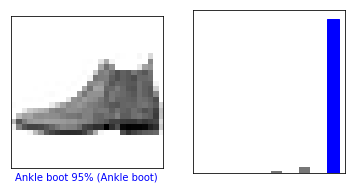

In [52]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

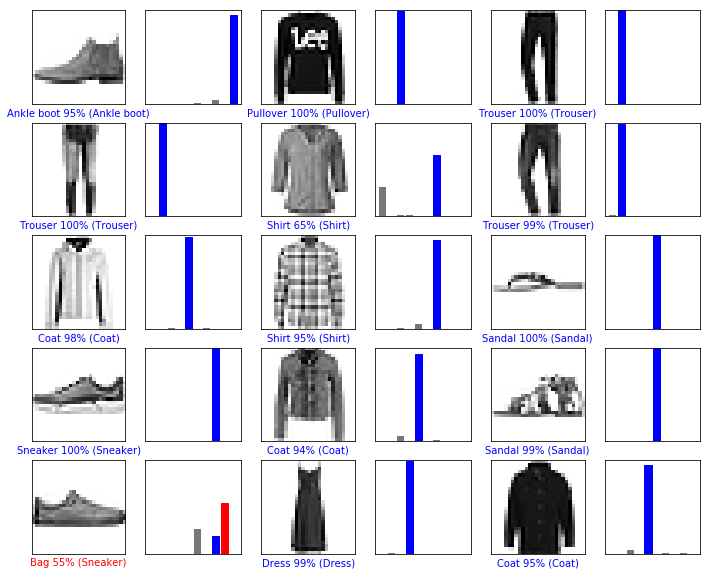

In [53]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

## Using trained model to make a prediction about a single image

In [54]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [55]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [56]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.0218639e-06 6.9980888e-07 9.1690879e-07 9.1868344e-08 2.1382295e-06
  1.3588013e-02 3.8151084e-06 3.9070450e-02 2.0503721e-04 9.4712782e-01]]


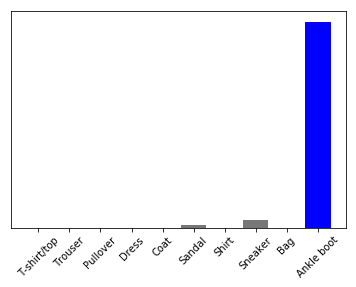

In [57]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [58]:
np.argmax(predictions_single[0])

9